**Gabe Darley**

**CMPS 3240-01**

**Homework 4**

1. REGULARIZED REGRESSION W/O CROSS-VALIDATION

E_out for lambda=0: 0.078842
E_out for lambda=0.00001: 0.078653
E_out for lambda=0.01: 0.073319
E_out for lambda=1: 0.210168


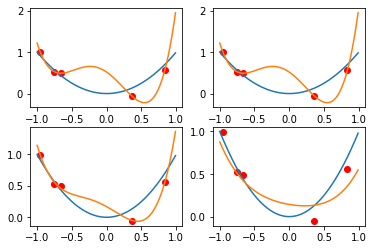

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#Establish target function with noise based on given sigma
N = 5
s_set = np.random.normal(0, 0.1, N)
X = np.random.uniform(-1, 1, N)
Y = X**2 + s_set

#Establish 4-dimensional data set
Z = np.dstack((np.ones(X.shape),
                X,
                0.5 * (3 * (X ** 2) - 1),
                0.5 * ((5 * X ** 3) - 3 * X),
                0.125 * ((35 * X ** 4) - (30 * X ** 2) + 3)))[0]

#List of given lambda values
L = [0, 0.00001, 0.01, 1]

#Make a list of regression functions for each lambda
I = np.identity(Z.shape[0])
x_axis = np.arange(-1, 1, 0.01)
grph_list = []
e_list = []

#Transform x axis plot values into five dimensions
Xstack = np.dstack((np.ones(x_axis.shape),
                    x_axis,
                    0.5 * (3 * (x_axis ** 2) - 1),
                    0.5 * ((5 * x_axis ** 3) - 3 * x_axis),
                    0.125 * ((35 * x_axis ** 4) - (30 * x_axis ** 2) + 3)))[0]

#Calculate hypothesis with some math I don't understand >:)
ZtZ = np.matmul(np.transpose(Z), Z)
ZtY = np.matmul(np.transpose(Z), Y)
for lam in L:
    Z_inv = np.linalg.pinv(np.add(ZtZ, np.multiply(lam, I)))
    w = np.matmul(Z_inv, ZtY)
    h = np.matmul(Xstack, np.transpose(w))

    #Calculate error in here too
    e_sum = 0
    j = 0
    for j in range(len(X)):
        e_sum += (((X[j]**2) - w[j])**2)
    e_list.append(e_sum / len(X))

    grph_list.append(h)

#Plot lambda functions
f_y = x_axis**2

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(X, Y, 'ro')
axs[0, 1].plot(X, Y, 'ro')
axs[1, 0].plot(X, Y, 'ro')
axs[1, 1].plot(X, Y, 'ro')

axs[0, 0].plot(x_axis, f_y, label='target')
axs[0, 1].plot(x_axis, f_y, label='target')
axs[1, 0].plot(x_axis, f_y, label='target')
axs[1, 1].plot(x_axis, f_y, label='target')

axs[0, 0].plot(x_axis, grph_list[0], label='lamda = 0')
axs[0, 1].plot(x_axis, grph_list[1], label='lamda = 0.00001')
axs[1, 0].plot(x_axis, grph_list[2], label='lamda = 0.01')
axs[1, 1].plot(x_axis, grph_list[3], label='lamda = 1')

print("E_out for lambda=0: %f" % e_list[0])
print("E_out for lambda=0.00001: %f" % e_list[1])
print("E_out for lambda=0.01: %f" % e_list[2])
print("E_out for lambda=1: %f" % e_list[3])

plt.show()

The out-of-sample errors for the lambda values are as follows:

E_out for lambda=0: 0.078842

E_out for lambda=0.00001: 0.078653

E_out for lambda=0.01: 0.073319

E_out for lambda=1: 0.210168

The best value for lambda seems to be 0.01, since the error here is the smallest. This follows the pattern that some values will overfit the data (smaller values, like 0) and some values will underfit and flatten the curve too much (larger values, like 1).